# Census Income:

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

#The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading csv file to import data to jupyter notebook for analysis
data=pd.read_csv("census_income.csv")
df=pd.DataFrame(data)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# lets check first 10 rows using df.head(10)
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# checking last 10 rows
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis(EDA):

In [5]:
# Lets check the shape of the dataset
df.shape

(32560, 15)

* this is a big Dataset with 32,560 rows and 15 columns

In [6]:
# lets check the Name of the columns present in the dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# Checking the information regarding non-null count and datatype in all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* HEre we can observe that there are few columns which are not required for our prediction such as relationship and race, these are my initial impressions will analyse more further. 
* Here we can also clearly see that there are no null values present in any row of any column
* Our Target column Income is and Object Datatype, so will convert it later on.

In [8]:
# Lets check the dataset for null values once again to be absolutely sure
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

* Using isnull() method as well we can see that there are no null values present in the dataset

In [9]:
# lets check the datatype of all the columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

* There are 6 integer columns and 9 object columns
* Our target column Income is also object datatype.

In [10]:
# lets now check unique values present in all the columns
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

 * These are the unique values present in all the columns of the dataset.
 * There is one column named Fnlwgt, it has 21,647 unique values, lets analyse further but seems like we have to drop this as it might have impact on our model building and predictions.
 * Here we can observe that there are 2 unique values present in our target column Income(1. <=50k , 2. >50k)

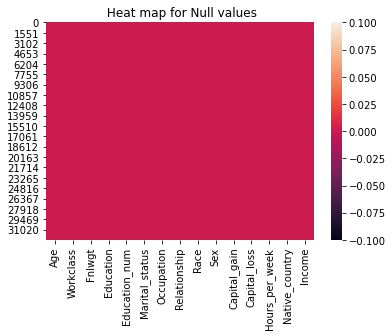

In [11]:
# lets visualize null values using heatmap
sns.heatmap(df.isnull())
plt.title(" Heat map for Null values")
plt.show()

* Here also we can see that there are no null values present in the dataset.

In [12]:
# Lets check unique values present in our target column
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

* Here we can see that there are 2 kind of unique values present in the target column Income
1) <=50k
2) >50k

In [13]:
# Checking value_counts of the whole dataset to observe what kind of data are present in all the columns
for i in df.columns:
    print(df[i].value_counts())
    print("--------------------------------------")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
--------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
--------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Do

* Here we can observe that there is " ? " sign present in three columns workplace, occupation and native_country

In [14]:
# lets change the " ? " using mode value as all the three columns are categorical/ object columns
df["Workclass"].mode()

0     Private
dtype: object

* Here we got mode 'Private' for column Workclass

In [15]:
# Saving mode value in place of ?
df["Workclass"]= df.Workclass.str.replace("?","Private")

In [16]:
df["Occupation"].mode()

0     Prof-specialty
dtype: object

* For Occupation column we got the "prof-specialty" as mode

In [17]:
# Saving mode value in place of ?
df["Occupation"]= df.Occupation.str.replace("?","Pr0f-specialty")

In [18]:
df["Native_country"].mode()

0     United-States
dtype: object

* Here we can see that mode of Native_country is United States( as this data is collected from United States)

In [19]:
# Saving mode value in place of ?
df["Native_country"]= df.Native_country.str.replace("?","United-States")

In [20]:
# Lets check the values present in the column Capital_gain
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

* Here we can see that out of 32,560 rows, 29,849 rows have value 0, so we can consider dropping it as this is not going to help us in predictions.

In [21]:
# Lets check value counts in column Capital_loss
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

* Here also we can notice that there are 31041 rows having value 0 out of 32,560 rows.

In [22]:
# lets check value counts in column in Fnlwgt
df["Fnlwgt"].value_counts()

203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64

* This columns has 21647 unique values and these are not id's as id's cant be assigned to more that 1 person

In [23]:
# lets check the statistical summary of the dataset provided
df.describe(include="all")

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,8,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24532,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29752,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [24]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* here looking at the two describe method we can see that there are lot of NaN values and 0 values are present in the dataset
* we can observe presence of outliers in the columns Age and hours_per_week
* we can also see some skewness present in column Age

In [25]:
# lets drop capital_gain and capital loss columns fro the given dataset
df=df.drop(["Capital_gain","Capital_loss"], axis=1)

In [26]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


* We have successfully removed the columns which were not required for our project.

In [27]:
# Lets check df.describe()again
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


# Visualization:

In [28]:
# lets distribute our data into two variables category and integer.
category=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        category.append(i)
print(category)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [29]:
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        integer.append(i)
print(integer)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


* We can clearly see that data is divided successfully

# Univariate Analysis:
    We will analyse individual columns in this Analysis

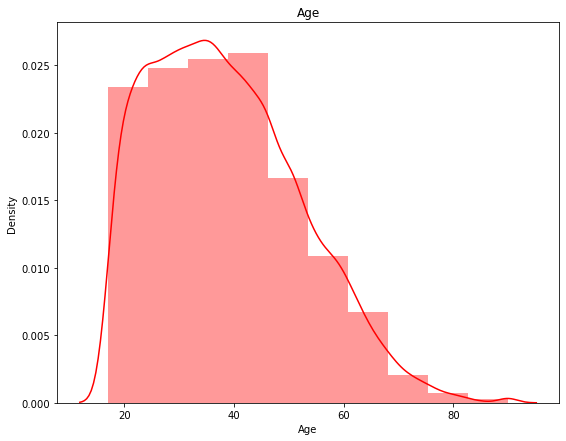

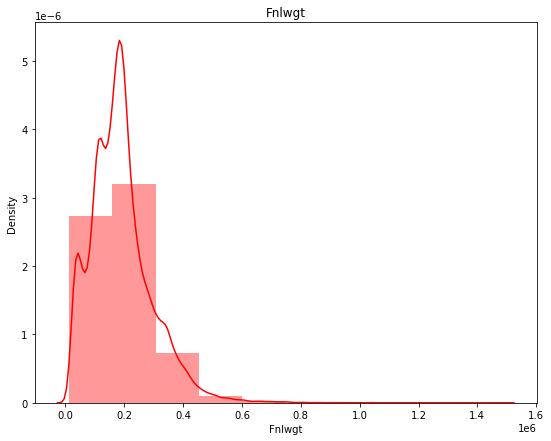

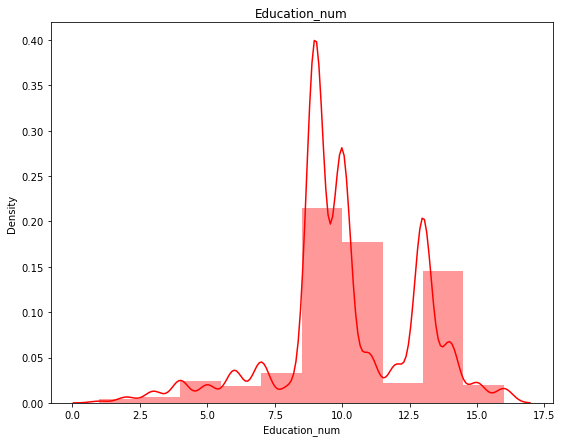

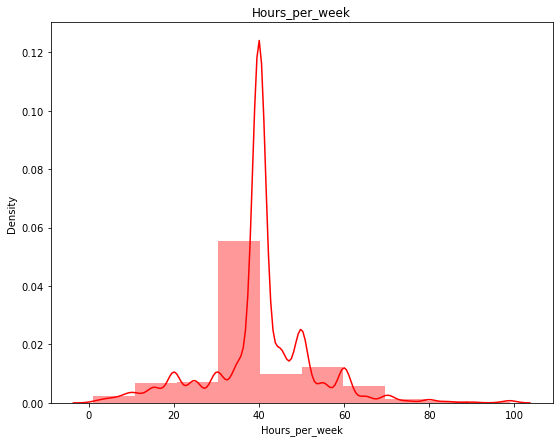

In [30]:
# lets visualize and check all the columns using distplot

for i in df[integer]:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i], color="r", bins=10)
    plt.title(i)
    plt.show()

* We can clearly observe skewness in all the columns except column Age, Age is sligtly skewed towards right.

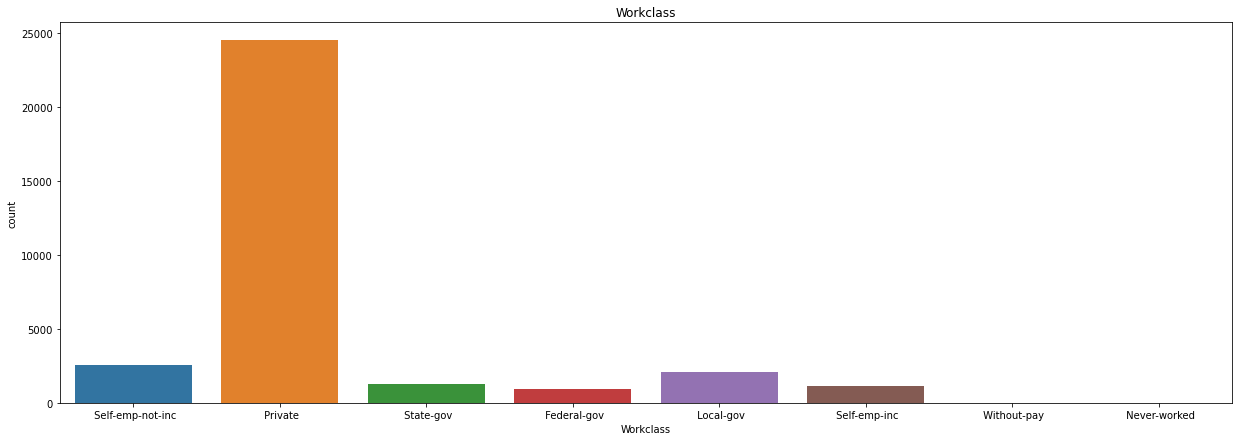

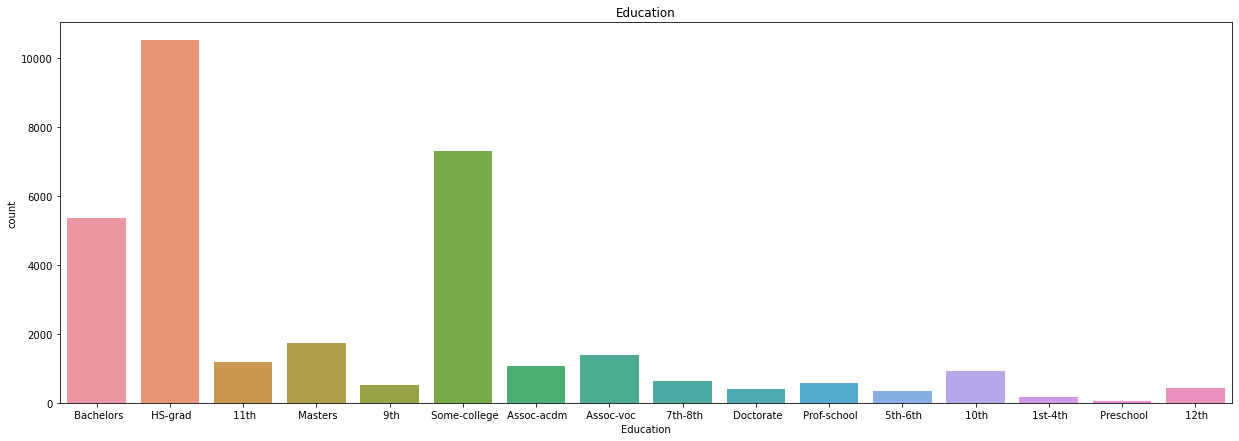

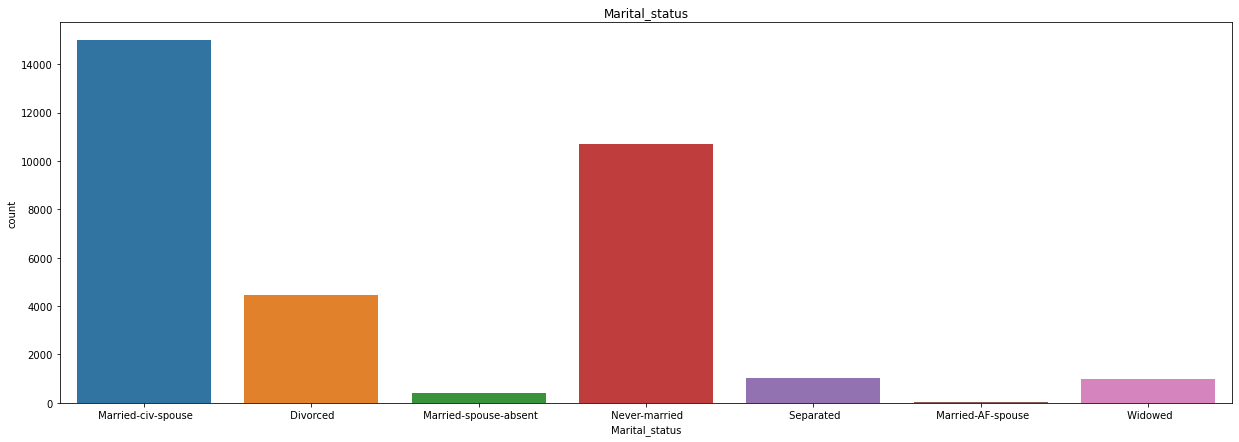

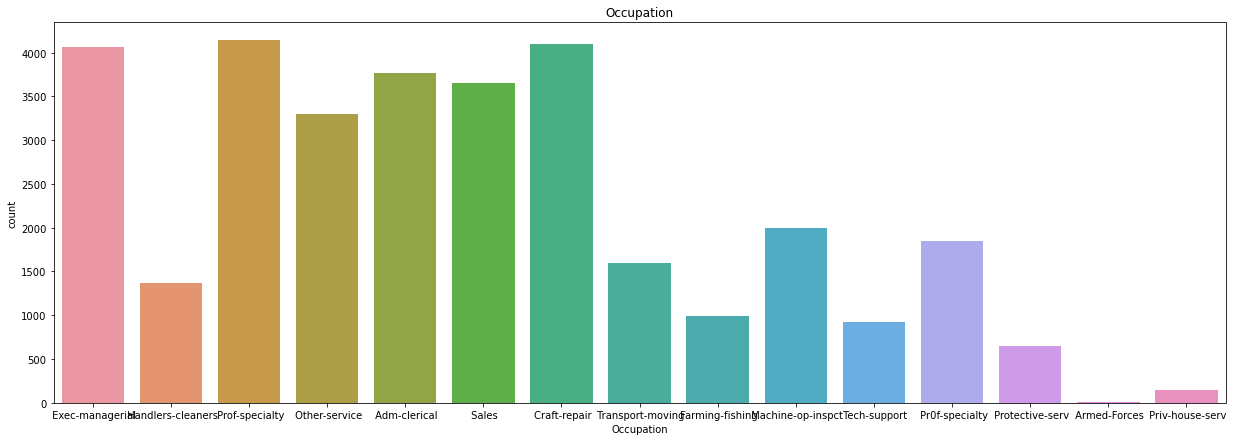

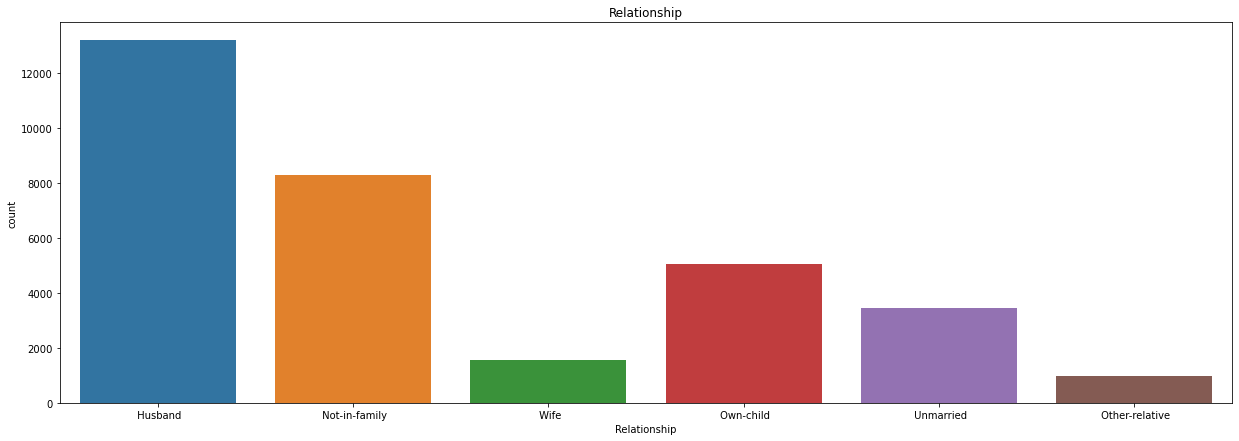

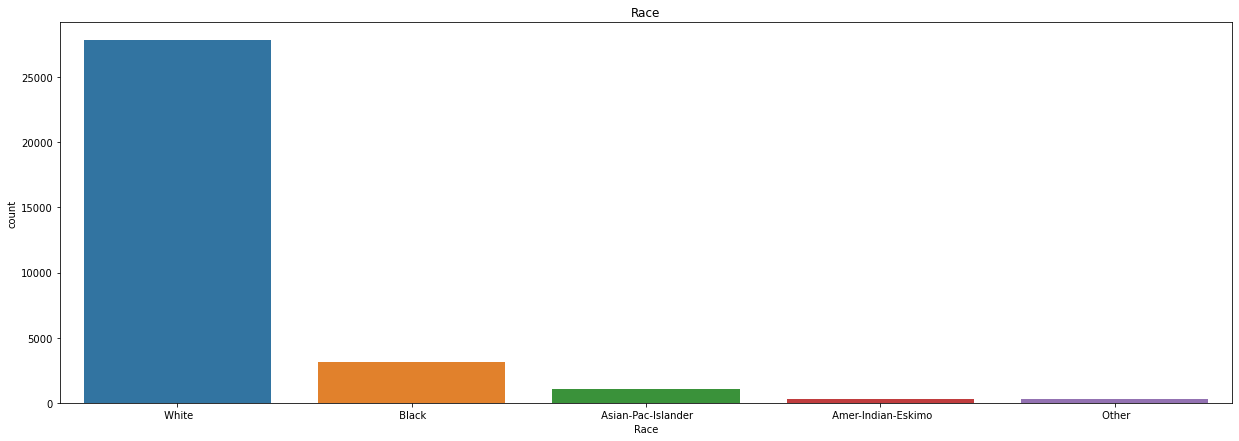

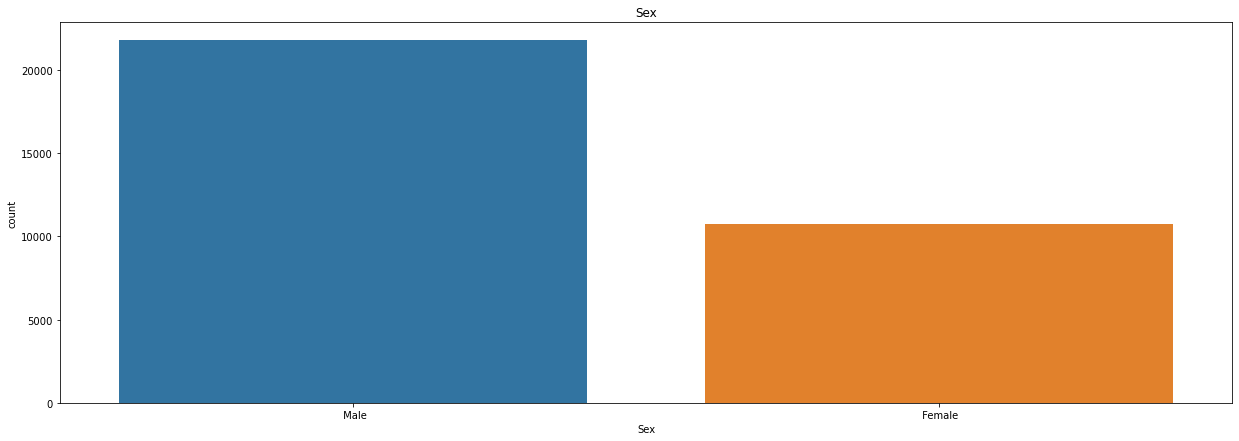

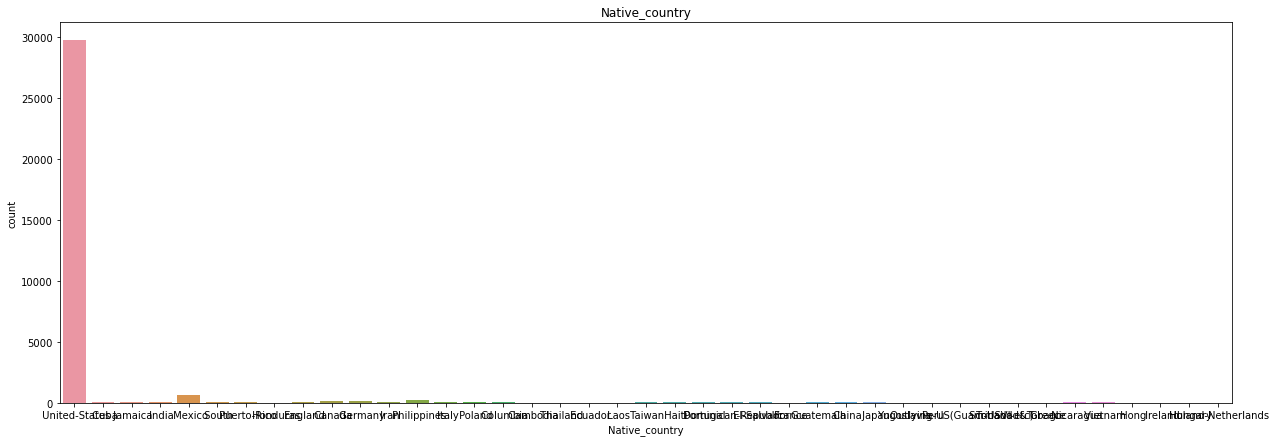

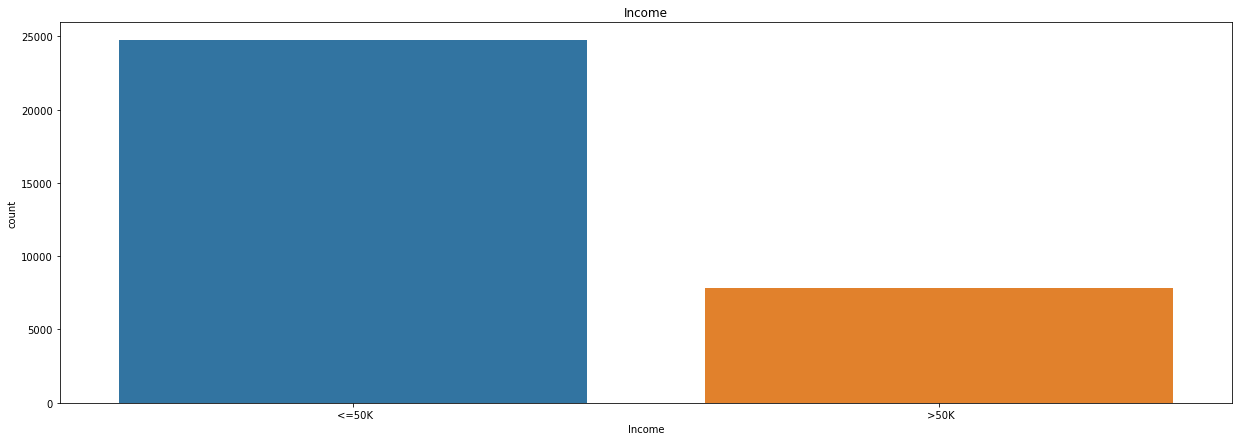

In [31]:
# lets visualize and check all the columns in category using countplot

for i in df[category]:
    plt.figure(figsize=(21,7))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

* OBserving workplace column we can see that most people work with prive companies
* in Education column we can see that most people has done HS-grad, then some_college and Bachelors
* In Marital_status column we can clearly see that most employees are married and living with there families
* In Column Occupation most of the employees are into prof-speciality,executive manager, craft_repair
* relationship tells that mostly employees are husband or not in family.
* Race column tells us that maximum employees are white
* we can clearly see that most employees are male in column sex.
* This data was collected in United States so, we can clearly see that most of the employees are from United States.
* While observing income column we can clearly see that most employees in this dataset is earning <=50k

# Bivariate Analysis:
    using this we can analyse 2 columns together, we can check correlation between two columns

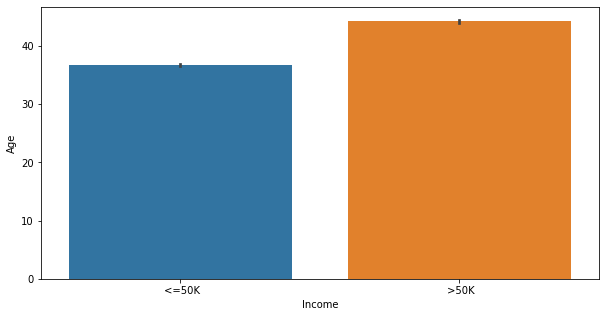

In [32]:
# Lets check correlation between age and income column
plt.figure(figsize=(10,5))
sns.barplot(x='Income',y="Age",data=df)
plt.show()

* Here we can clearly see that more the age and experience of employee more there salaries are.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

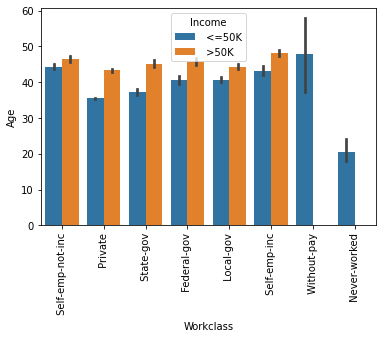

In [33]:
# lets plot for workclass and Age
sns.barplot(x="Workclass",y="Age", hue="Income", data=df)
plt.xticks(rotation=90)

* Here we can observe that clearly people in each field have a chance of getting income >50k. except people who never worked or worked without pay

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

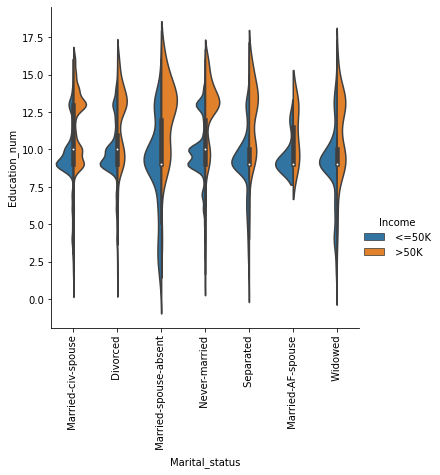

In [36]:
# lets check marital_status and Education_num
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income",kind= "violin", data=df, split=True)
plt.xticks(rotation=90)

* Showing correlation of marital_status and Education_num
* this plot is showing people who are married but spouse is not present has high eduacation number

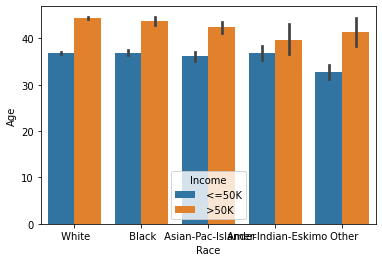

In [37]:
# lets plot barplot for age and race
sns.barplot(x="Race",y="Age",hue="Income",data=df)
plt.show()

* White people are getting Higher Incomes in the US as compared to any other category.

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

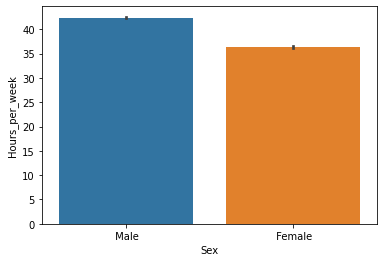

In [41]:
# lets plot hours_per_week with column Age
sns.barplot(df['Sex'],df['Hours_per_week'])

* Here we can clearly see that males are working more hours per week as compared to females

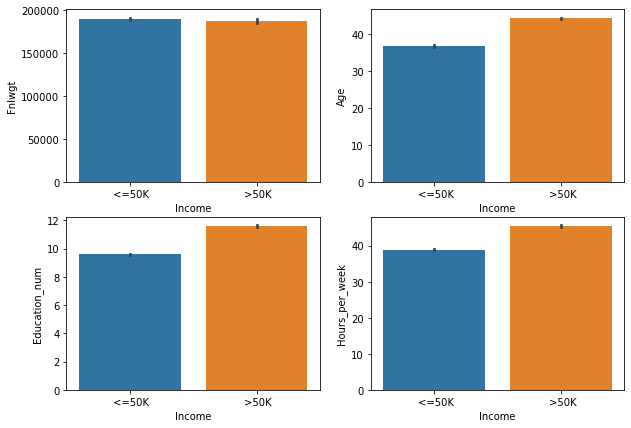

In [42]:
fig,axes=plt.subplots(2,2,figsize=(10,7))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df)

# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df)

# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df)

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df)
plt.show()

* With age chances of getting >50k are more as u will also gain experience by that time.
* Higher the Education_num, higher are your chances of getting >50k
* More you work , more income you get its tit for tat, more hours per week you work, more are the chances of getting income more than 50k.

# MultiVariate Analysis:
    we will compare or check correlation between more than 2 columns or may be all the columns in the dataset.

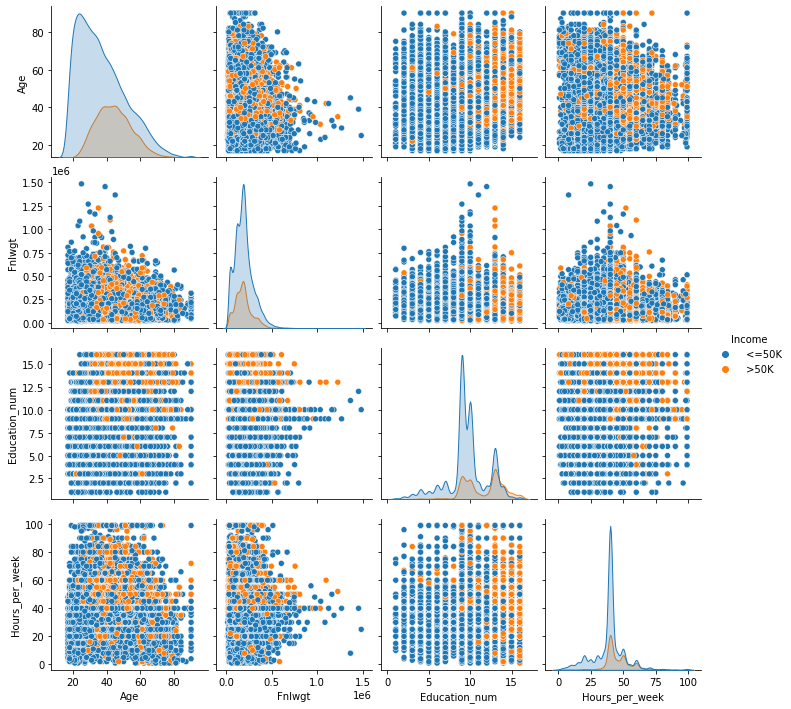

In [43]:
# lets check the correlation amoung all the columns
sns.pairplot(df,hue="Income")

In [44]:
df.corr()

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.148127
Hours_per_week,0.068756,-0.018770,0.148127,1.000000


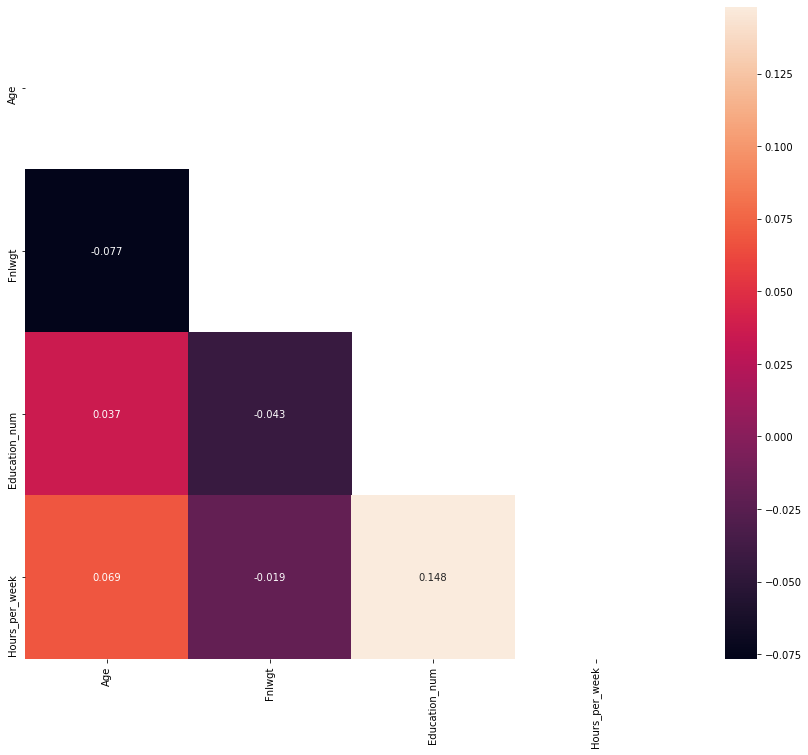

In [46]:
# Lets visualise it for better understanding the above correlation chart.
tri=np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

# OutLiers:

<AxesSubplot:>

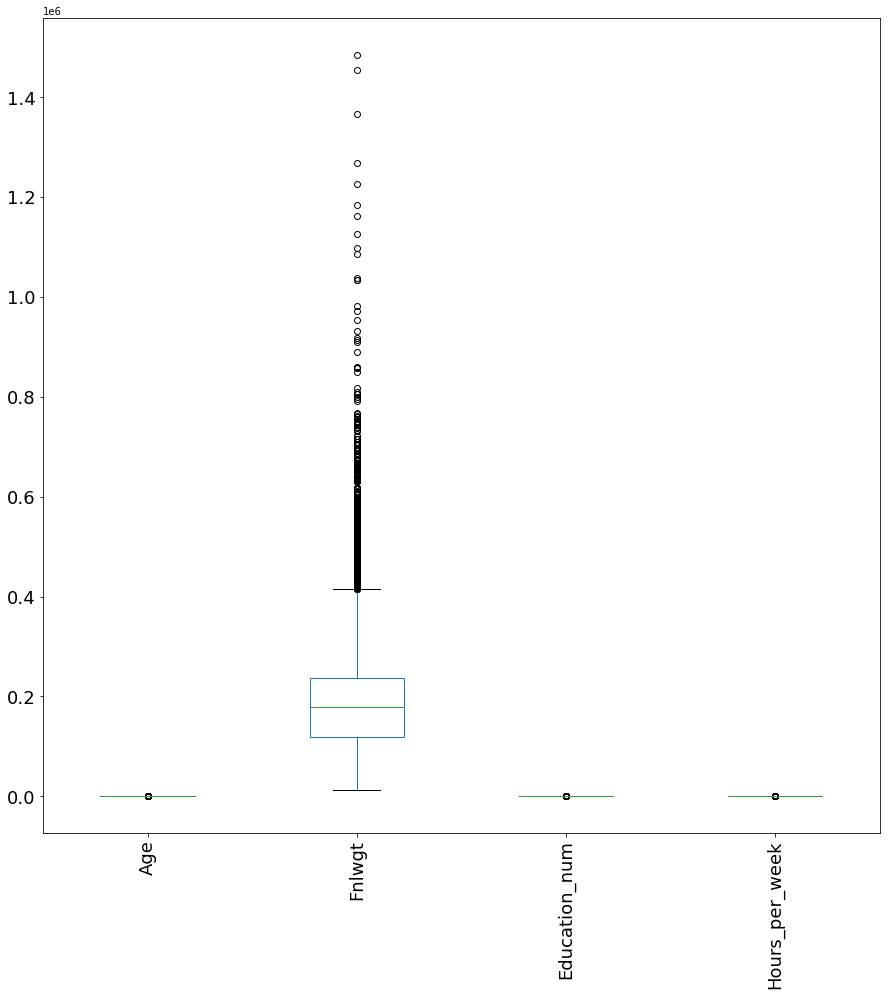

In [47]:
# Lets check presence of outliers in whole dataframe using boxplot
df.plot(kind="box",fontsize=18,figsize=(15,15),rot=90)

* Here we can see that outliers are present in all the integer/numerical columns of the dataset.lets fix them.

# Removing outliers using ZScore Method:

In [48]:
out=df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

In [49]:
# importing required libraries
from scipy.stats import zscore
z=np.abs(zscore(out))
df1=df[(z<3).all(axis=1)]
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [50]:
# lets check whether we have successfully removed outliers or not?
df1.shape

(31461, 13)

In this new dataset there are 31461 rows in 13 columns

In [51]:
# Shape of old df
df.shape

(32560, 13)

In [52]:
# lets check the dataloss
loss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)
loss

3.3753071253071254

* Using zscore method the dataloss is just 3.37 which is under advised limit of 10%.

# Skewness:

In [53]:
# lets check presence of skewness in new dataframe
df1.skew()

Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

prefered range of skewness is+/-0.50, only fnlwgt is going beyond the range, some skewness is present in this column, lets remove the skewness in this column

In [54]:
# removing skewness using yeo-johnson method
# importing required libraries for that
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
'''
parameters:
method="box_cox or "yeo-johnson
'''

'\nparameters:\nmethod="box_cox or "yeo-johnson\n'

In [58]:
f=["Fnlwgt"]

In [59]:
# lets remove the skewness
df1[f]=scaler.fit_transform(df1[f].values)

In [60]:
# lets check the skewness again
df1[f].skew()

Fnlwgt   -0.034507
dtype: float64

# here we can see that we have successfully removed the skewness from this column

# Label Encoding:

In [62]:
# Lets divide the data first, categorical/ numerical
category1=[]
integer1=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=="object":
        category1.append(i)
    else:
        integer1.append(i)
print(category1)
print(integer1)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


In [63]:
# lets import required library
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1[category1]=df1[category1].apply(le.fit_transform)

In [64]:
df1[category1].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,8,2,3,0,4,1,38,0
1,3,10,0,5,1,4,1,38,0
2,3,1,2,5,0,2,1,38,0
3,3,8,2,10,5,2,0,4,0
4,3,11,2,3,5,4,0,38,0


* we have successfully converted all categorical columns to integer or numerical columns.

In [65]:
# Now lets check correlation a in all columns using heatmap
df1.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.038024,-0.066519,-0.000447,0.053361,-0.286424,0.000905,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,0.038024,1.000000,-0.021654,0.004652,0.003831,-0.020597,0.007444,-0.056825,0.046295,0.070095,0.030311,-0.001602,0.003494
Fnlwgt,-0.066519,-0.021654,1.000000,-0.024191,-0.033150,0.027732,0.002382,0.008287,-0.008299,0.025290,-0.015566,-0.061214,-0.004586
Education,-0.000447,0.004652,-0.024191,1.000000,0.356040,-0.039094,-0.031709,-0.015121,0.015552,-0.024911,0.061325,0.068374,0.077526
Education_num,0.053361,0.003831,-0.033150,0.356040,1.000000,-0.065568,0.102128,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.286424,-0.020597,0.027732,-0.039094,-0.065568,1.000000,0.024574,0.185772,-0.067546,-0.127375,-0.197532,-0.017606,-0.198475
Occupation,0.000905,0.007444,0.002382,-0.031709,0.102128,0.024574,1.000000,-0.046743,0.000417,0.051064,-0.000541,-0.002055,0.051945
Relationship,-0.268028,-0.056825,0.008287,-0.015121,-0.102497,0.185772,-0.046743,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.046295,-0.008299,0.015552,0.030849,-0.067546,0.000417,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.070095,0.025290,-0.024911,0.016662,-0.127375,0.051064,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Workclass'),
  Text(0, 2.5, 'Fnlwgt'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Education_num'),
  Text(0, 5.5, 'Marital_status'),
  Text(0, 6.5, 'Occupation'),
  Text(0, 7.5, 'Relationship'),
  Text(0, 8.5, 'Race'),
  Text(0, 9.5, 'Sex'),
  Text(0, 10.5, 'Hours_per_week'),
  Text(0, 11.5, 'Native_country'),
  Text(0, 12.5, 'Income')])

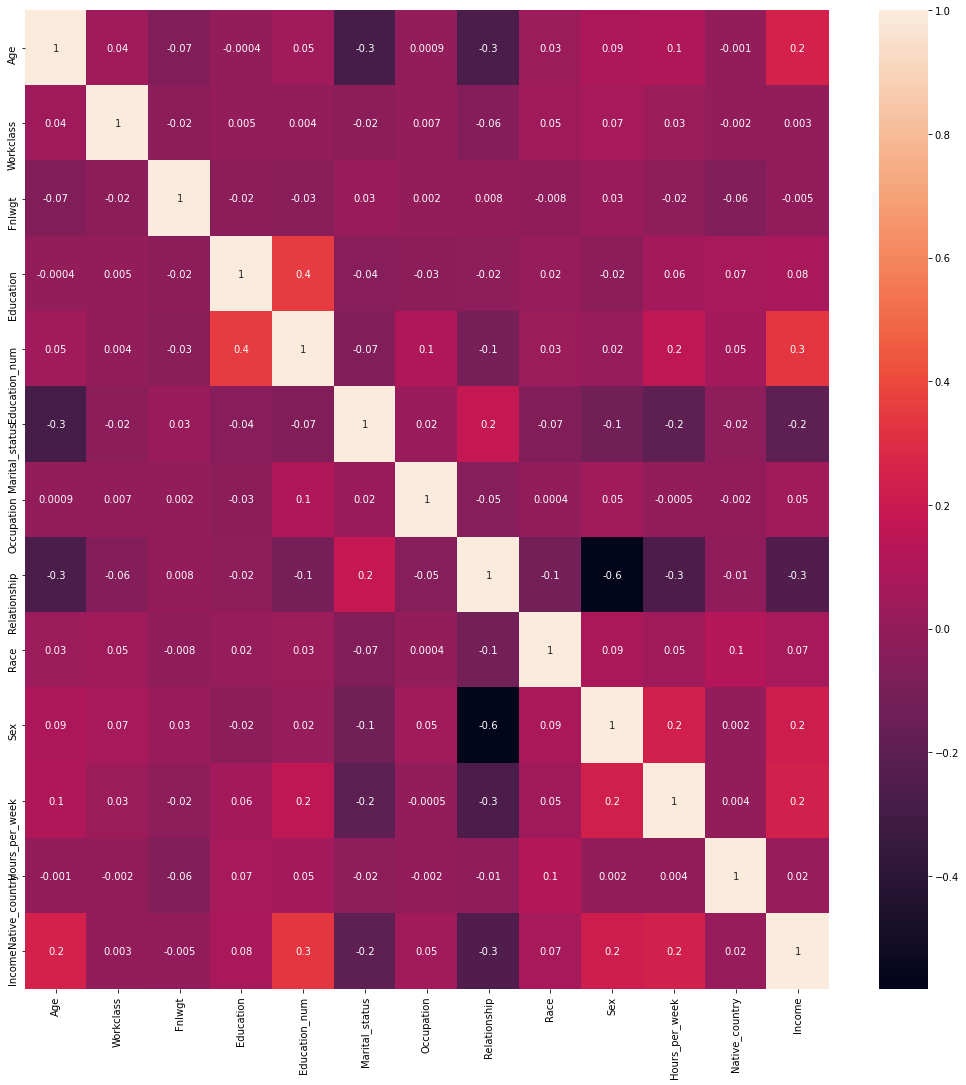

In [67]:
# lets visualize it using heatmap
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(),fmt='.1g',annot=True,linecolor='black')
plt.yticks(rotation=90)

* here in the heatmap we can observe that only age and education_no. have some positive correlation with our target column Income.
* even hours_per_week, sex and native_country also relate positively with the target column income.
* Relationship and marital_status have negative correlation with target column.

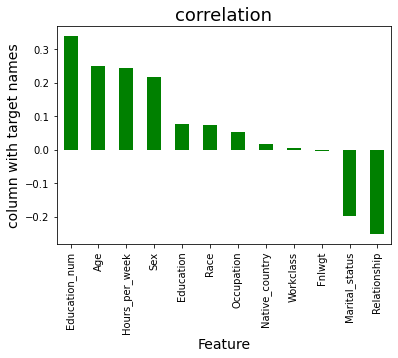

In [69]:
df1.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

* Here we can see more clearly that marital_status and relationship are negatively correlated with target column.

In [70]:
# lets seperate x and y for training and testing purpose
x=df1.drop("Income",axis=1)
y=df1["Income"]

# Scaling:

In [71]:
# Scaling the data using standard scaler
# importing required Libraries
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [72]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,1.722723,-1.114171,-0.348344,1.154324,-0.403597,-0.785223,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,-0.080441,0.427192,0.245782,-0.459657,-1.733114,-0.325029,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,-0.080441,0.607320,-2.427783,-1.266647,-0.403597,-0.325029,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,-0.080441,1.487719,-0.348344,1.154324,-0.403597,0.825456,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,-0.080441,1.048962,0.542845,1.557819,-0.403597,-0.785223,2.203019,0.391304,-1.415226,-0.008364,0.254062


* This is the feature data after successfully scaling using StandardScaler

# OverSampling:

In [73]:
# lets balance the target variable y using oversampling method
y.value_counts()

0    23853
1     7608
Name: Income, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [75]:
# Let us check the y value count again
y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

* Here we can see that we have successfully balanced the data using oversampling.

<AxesSubplot:xlabel='Income', ylabel='count'>

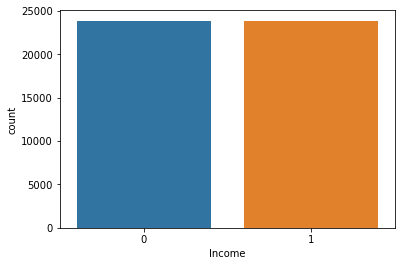

In [76]:
# lets visualize it too
sns.countplot(y)

* now we can see that both have equal counts

# Best Random State:

In [77]:
# lets find best random state and accuracy for our models
# importing required libraries
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [79]:
max_acc=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best accuracy score: ",max_acc,"on Random_state: ",max_rs)

Best accuracy score:  0.8888345444382336 on Random_state:  194


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=194)

# Models based on Classification Algorithms:

In [83]:
# lets import all required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1) K-Neighbor Classifier:

In [84]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("R2 Score: ", accuracy_score(y_test,pred_knn))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

R2 Score:  0.8439072107322526
Confusion Matrix:  [[5420 1681]
 [ 553 6658]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7101
           1       0.80      0.92      0.86      7211

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



* using KNN we are getting accuracy score of 84.4 which is good.

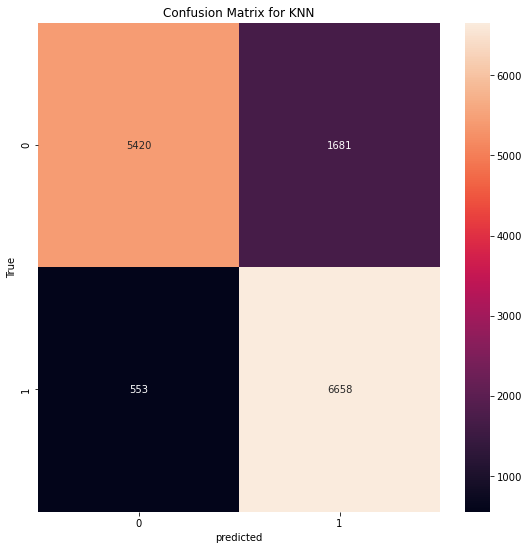

In [86]:
cm=confusion_matrix(y_test, pred_knn)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

In [ ]:
* We can observe predicted values and true values using knn confusion matrix

# 2) SupportVectorClassifier:

In [87]:
sv=SVC()
sv.fit(x_train,y_train)
pred_sv=sv.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_sv))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

R2 score:  0.8257406372275014
Confusion Matrix:  [[5460 1641]
 [ 853 6358]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      7101
           1       0.79      0.88      0.84      7211

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



Using SVC we are getting accuracy score of 82.6% which is lower than KNN

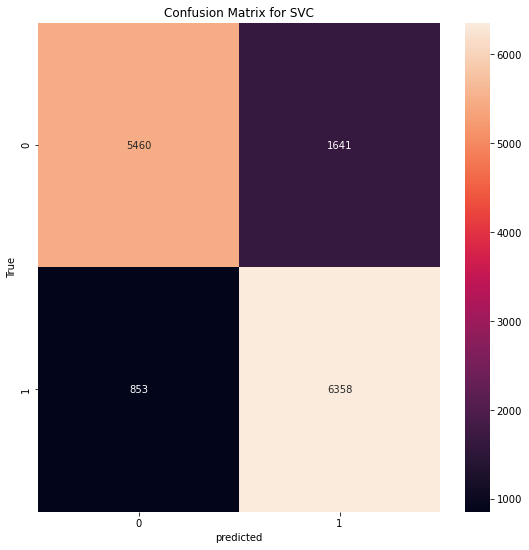

In [88]:
cm=confusion_matrix(y_test, pred_sv)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVC")
plt.show()

In [ ]:
* We can observe predicted values and true values using SVC confusion matrix

# 3) GradientBoostingClassifier:

In [89]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_gbc))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

R2 score:  0.8545975405254332
Confusion Matrix:  [[5855 1246]
 [ 835 6376]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7101
           1       0.84      0.88      0.86      7211

    accuracy                           0.85     14312
   macro avg       0.86      0.85      0.85     14312
weighted avg       0.86      0.85      0.85     14312



* Here we are getting better accuracy score of 85.5% using GBC as compared to KNN

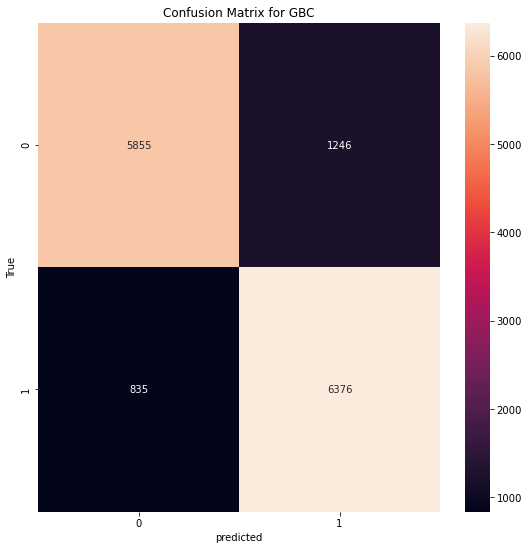

In [90]:
cm=confusion_matrix(y_test, pred_gbc)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for GBC")
plt.show()

* We can observe predicted values and true values using GBC confusion matrix

# 4) LogisticRegression:

In [91]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_lr))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

R2 score:  0.7507685858021241
Confusion Matrix:  [[5223 1878]
 [1689 5522]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      7101
           1       0.75      0.77      0.76      7211

    accuracy                           0.75     14312
   macro avg       0.75      0.75      0.75     14312
weighted avg       0.75      0.75      0.75     14312



Using Logistic Regression we are getting accuracy score of 75%. which is low as compared to other models

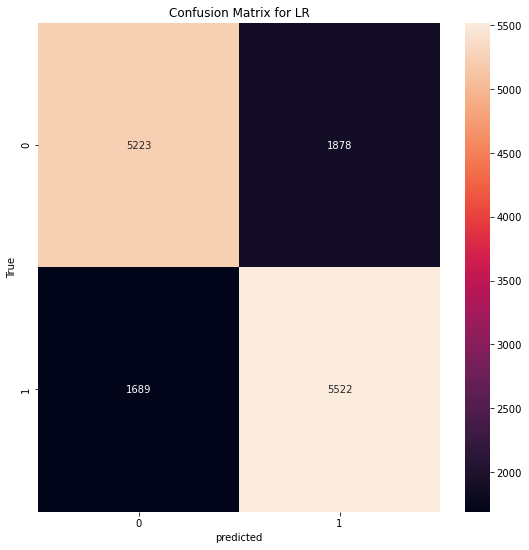

In [92]:
cm=confusion_matrix(y_test, pred_lr)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for LR")
plt.show()

* We can observe predicted values and true values using LR confusion matrix

# 5) DecisionTreeClassifier:

In [93]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_dtc))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

R2 score:  0.8334264952487423
Confusion Matrix:  [[5888 1213]
 [1171 6040]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7101
           1       0.83      0.84      0.84      7211

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



* Using Decision Tree Classifier we are getting accuracy score of 83.3% which is good but still lower than GBC.

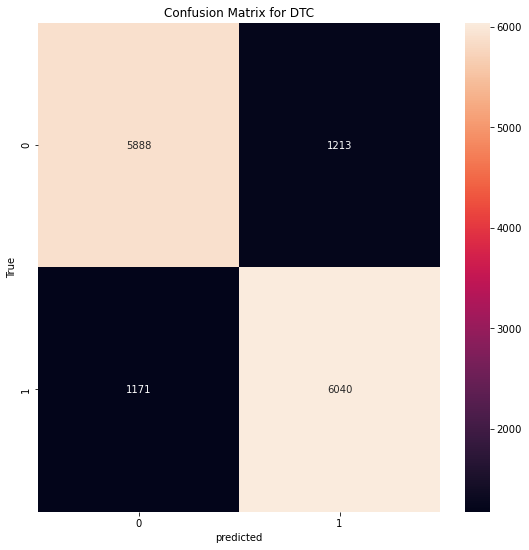

In [94]:
cm=confusion_matrix(y_test, pred_dtc)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for DTC")
plt.show()

* We can observe predicted values and true values using DTC confusion matrix

# 6) RandomForestClassifier:

In [95]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print("R2 score: ", accuracy_score(y_test,pred_rfc))
print("Confusion Matrix: ",confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

R2 score:  0.8886948015651202
Confusion Matrix:  [[6206  895]
 [ 698 6513]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7101
           1       0.88      0.90      0.89      7211

    accuracy                           0.89     14312
   macro avg       0.89      0.89      0.89     14312
weighted avg       0.89      0.89      0.89     14312



* we are getting best result from RandomForestClassifier accuracy score is 88.9% which is very good and better than all other models.

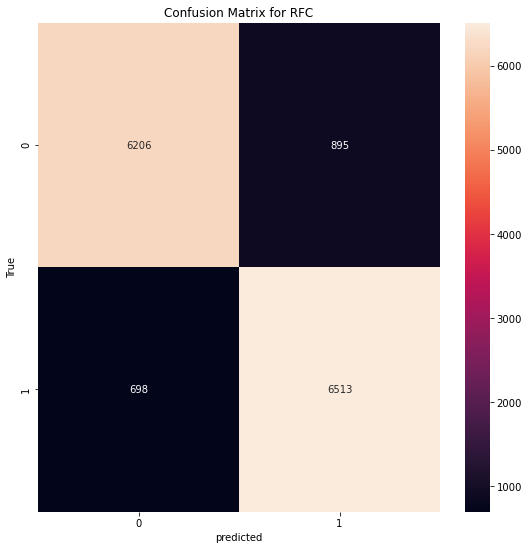

In [97]:
cm=confusion_matrix(y_test, pred_rfc)

x_axis_labels= ["<=50",">50"]
y_axis_labels= ["<=50",">50"]

f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".0f", linecolor="black")
plt.xlabel("predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for RFC")
plt.show()

* We can observe predicted values and true values using RFC confusion matrix

# Cross Validation Score:

In [98]:
# lets check cross validation score before selecting model for tuning
# importing required libraries
from sklearn.model_selection import cross_val_score

In [100]:
# cv score for knn
print(cross_val_score(knn,x,y,cv=5).mean())

0.8482374834279293


In [101]:
# cv score for SVC
print(cross_val_score(sv,x,y,cv=5).mean())

0.8221400119169306


In [102]:
# cv score of GBC
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8490976043533813


In [103]:
# cv score of LR
print(cross_val_score(lr,x,y,cv=5).mean())

0.7513312676236664


In [104]:
# cv score of dtc
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8321402841043162


In [105]:
# cv score of RFC
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8845861755477704


* Here we can see that after cross validation score there is very little drop in the score of Random Forest Classifier.

# After looking all the model accuracy score and cross validation score i am selection RandomforestClassifier as the best model.

# Hyper Parameter Tuning:

In [106]:
# importing required library
from sklearn.model_selection import GridSearchCV

In [107]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [108]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [109]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [110]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'n_estimators': 400}

* Here we got the best parameters for Random Forest Classifier

In [112]:
final_model=RandomForestClassifier(criterion= "entropy" ,max_depth=25  ,max_features="sqrt"  ,n_estimators=400 )
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

88.7157629960872


* Our best model Random Forest Classifier and i got accuracy of 88.715% after tuning it which is quite good.

# ROC-AUC Curve:

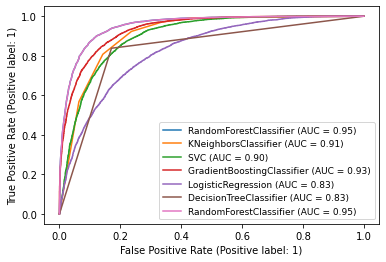

In [115]:
# plotting all the models here
# importing required libraries
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
dis=plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=dis.ax_)
plot_roc_curve(sv,x_test,y_test, ax=dis.ax_)
plot_roc_curve(gbc,x_test,y_test, ax=dis.ax_)
plot_roc_curve(lr,x_test,y_test, ax=dis.ax_)
plot_roc_curve(dtc,x_test,y_test, ax=dis.ax_)
plot_roc_curve(rfc,x_test,y_test, ax=dis.ax_)

plt.legend(prop={"size":9}, loc="lower right")
plt.show()

* Here you can see the ROC curves for all the models that we have predicted

# Saving The Model:

In [117]:
# importing required library
import joblib
joblib.dump(final_model,"CensusIncomeprediction.pkl")

['CensusIncomeprediction.pkl']

* I have successfully saved the censusincomeprediction.pkl

# Loading Model and Predictions:

In [118]:
# loading the saved model
model=joblib.load("CensusIncomeprediction.pkl")

prediction=model.predict(x_test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [119]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311
predicted,0,1,1,0,0,1,1,1,1,0,...,0,1,0,1,1,1,1,0,1,1
Actual,0,0,0,1,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,1,1


* Here are the predicted values and the actual values. They are almost same.